In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Calibration data

In [385]:
data = pd.read_csv("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/data/dynamic/calibration_incidence.csv", sep=',',decimal='.')
data=data.drop("Unnamed: 0",axis=1)
data.head(23)


,year,var,Lower,Mean,Upper
0,2000,e_inc_num,56000,139000,259000
1,2001,e_inc_num,57000,159000,312000
2,2002,e_inc_num,57000,175000,357000
3,2003,e_inc_num,54000,206000,456000
4,2004,e_inc_num,54000,221000,501000
5,2005,e_inc_num,56000,226000,510000
6,2006,e_inc_num,56000,239000,549000
7,2007,e_inc_num,60000,235000,525000
8,2008,e_inc_num,66000,221000,467000
9,2009,e_inc_num,68000,228000,483000


Text(0.5, 1.0, 'Estimated Incident cases of TB')

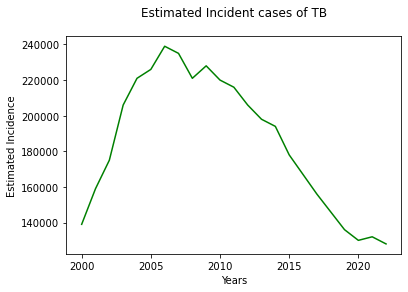

In [386]:
plt.plot(data["year"], data['Mean'],label="mean_estimate",color="green")
#plt=dataSoil.plot(x="days",y="bacteria_measured")
plt.xlabel('Years')
plt.ylabel('Estimated Incidence')
plt.title("Estimated Incident cases of TB",pad=20)

# Load Model

In [401]:
model = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/V5_months.mdl")

In [402]:
model_output = model.run()
display(model_output.head(276))

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Detection,progression,Relapse,CDR,CFR,deaths TB,...,general mortality,infection,initial incident,initial latent,Latent TB infection,multi fact,Detected and Treated TB,relapse rate,force of infection,progression rate
0,276,0,12,1,11500.000000,100000.000000,165.000000,0.038333,0.007417,2225.000000,...,0.000667,43397.713835,300000,1000000.0,1.000000e+06,6,5.500000e+04,0.003,0.15,0.1
12,276,0,12,1,30901.472234,94243.404743,801.609288,0.038333,0.007417,8526.680110,...,0.000667,161010.739551,300000,1000000.0,1.103112e+06,6,2.672031e+05,0.003,0.15,0.1
24,276,0,12,1,58184.786562,160164.173468,2288.123032,0.038333,0.007417,14369.161743,...,0.000667,253988.463653,300000,1000000.0,2.070946e+06,6,7.627077e+05,0.003,0.15,0.1
36,276,0,12,1,99855.206374,268797.047261,4856.514429,0.038333,0.007417,24598.041533,...,0.000667,388405.706270,300000,1000000.0,3.316730e+06,6,1.618838e+06,0.003,0.15,0.1
48,276,0,12,1,166629.154108,405336.144311,9180.298111,0.038333,0.007417,40094.416790,...,0.000667,522934.473238,300000,1000000.0,4.765558e+06,6,3.060099e+06,0.003,0.15,0.1
60,276,0,12,1,258011.727342,532811.417912,16093.916703,0.038333,0.007417,59625.664711,...,0.000667,574503.871326,300000,1000000.0,5.798047e+06,6,5.364639e+06,0.003,0.15,0.1
72,276,0,12,1,356920.887970,572690.797454,26140.709486,0.038333,0.007417,77733.657597,...,0.000667,486818.754404,300000,1000000.0,5.556410e+06,6,8.713570e+06,0.003,0.15,0.1
84,276,0,12,1,424929.071158,476418.247997,38871.170357,0.038333,0.007417,85612.606346,...,0.000667,317083.950885,300000,1000000.0,3.978001e+06,6,1.295706e+07,0.003,0.15,0.1
96,276,0,12,1,425568.132223,300803.424943,52418.954574,0.038333,0.007417,78531.537773,...,0.000667,172175.521907,300000,1000000.0,2.128061e+06,6,1.747298e+07,0.003,0.15,0.1
108,276,0,12,1,360729.375370,150821.640163,64262.086588,0.038333,0.007417,61391.107681,...,0.000667,88862.200229,300000,1000000.0,9.463650e+05,6,2.142070e+07,0.003,0.15,0.1


<AxesSubplot:>

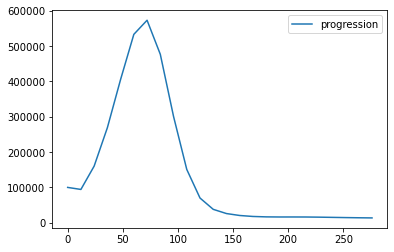

In [403]:
model_output.plot(y="progression")

## Calibration

In [440]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'force of infection'
parameter2 = 'relapse rate'
parameter3 = 'initial latent'
parameter4="progression rate"
parameter5 = 'CFR'
parameter6 = 'multi fact'



def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'force of infection':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial latent': parameter3_value,
                               "progression rate":parameter4_value,
                               'CFR': parameter5_value
                              },
                       return_columns=['progression'],
                       return_timestamps=list(data.index*12)[0:23])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Mean"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [441]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 1)

parameter5_guess =0.4
parameter5_bounds = (0.1,1)


res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds])
res

      fun: 63557354806.58558
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.18641508e+09, -6.04782486e+09, -1.67894265e+04, -1.70143432e+09,
        5.20655439e+09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 258
      nit: 17
     njev: 43
   status: 0
  success: True
        x: array([5.29236674e-01, 1.49857489e-01, 1.21717800e+05, 8.01011963e-01,
       5.10540279e-01])

In [442]:
p1, p2, p3,p4,p5= res.x
result = model.run(params=
                   {
                       'force of infection':p1,
                               'relapse rate':p2,
                               'initial latent': p3,
                               "progression rate":p4,
                               "CFR":p5
                   },
                   return_columns=['progression'])

result=result.reset_index(drop=True)
result["year"]=data["year"]

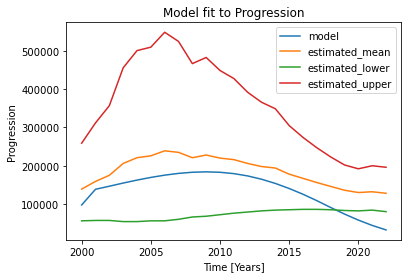

In [443]:
plt.plot(result["year"], result['progression'],label="model")
plt.plot(data["year"], data['Mean'], label='estimated_mean');
plt.plot(data["year"], data['Lower'], label='estimated_lower');
plt.plot(data["year"], data['Upper'], label='estimated_upper');
plt.xlabel('Time [Years]')
plt.ylabel('Progression')
plt.title('Model fit to Progression')
plt.legend(loc='upper right')
#plt.text(30,750000000, 'RMSE: 7.39% of Max', color='r', fontsize=12)